In [22]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Datasets/Skin_NonSkin.txt", names=['B', 'G', 'R', 'target'], sep="\t", index_col=False)
df.head()

,B,G,R,target
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [ ]:
train_accs = []
test_accs = []
svm_best_params = []

for i in range(10):

  print('-------- Sample {}-------\n'.format(i))
  dfi = df.sample(frac=0.1)
  X = dfi.iloc[:, :-1].values
  y = dfi.iloc[:, -1].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  # Optimize the SVM using grid search with cross-validation
  param_grid = {
      'C': [0.1, 1, 10, 100],
      'gamma': [0.1, 0.01, 0.001, 0.0001],
      'kernel': ['linear', 'rbf', 'sigmoid']
  }
  grid_search = GridSearchCV(SVC(), param_grid, cv=3, verbose=100, refit=True)
  grid_search.fit(X_train, y_train)
  best_params = grid_search.best_params_
  svm_best_params.append(best_params)

  print(best_params)
  # Train and test the SVM with the best parameters
  svm = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], max_iter=1000)
  svm.fit(X_train, y_train)
  train_acc = svm.score(X_train, y_train)
  test_acc = svm.score(X_test, y_test)
  train_accs.append(train_acc)
  test_accs.append(test_acc)

In [7]:
svm_best_params

[{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}]

In [8]:
test_accs

[0.9982317736670294,
 0.9974156692056583,
 0.9985038084874864,
 0.9979597388465724,
 0.9982317736670294,
 0.9974156692056583,
 0.9979597388465724,
 0.9980957562568009,
 0.9980957562568009,
 0.9975516866158868]

In [11]:
final_df = pd.DataFrame(data=[test_accs, svm_best_params], index=['Accuracy', 'Parameters']).T
final_df

,Accuracy,Parameters
0,0.998232,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
1,0.997416,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
2,0.998504,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
3,0.99796,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
4,0.998232,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
5,0.997416,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
6,0.99796,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
7,0.998096,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
8,0.998096,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
9,0.997552,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"


In [14]:
max_index = test_accs.index(max(test_accs))
max_index

2

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=max_index)

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
iterations = list()
acc_list = list()

for i in range(1000):
    x = i+1
    svm = SVC(C=100, gamma=0.1, kernel='rbf', max_iter=x)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)
    iterations.append(x)

In [19]:
iterations = np.array(iterations)
acc_list = np.array(acc_list)

In [20]:
print(iterations.shape)
print(acc_list.shape)

(1000,)
(1000,)


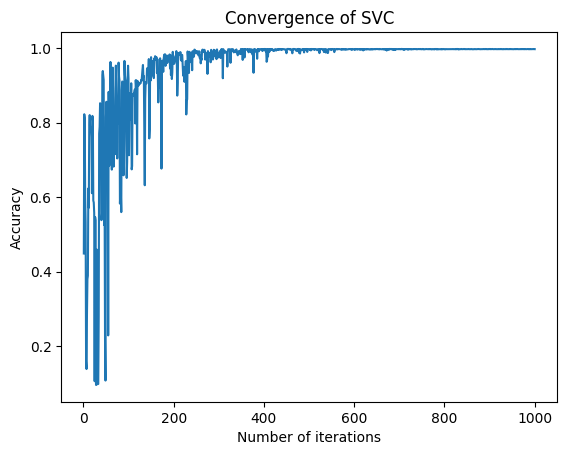

In [23]:
plt.plot(iterations, acc_list)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Convergence of SVC')
plt.show()